linear regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
#allows plot to directly appear in the notebook
%matplotlib inline

In [3]:
#read data into a dataframe
 
data = pd.read_csv("advertising.csv")
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
data.shape

(200, 4)

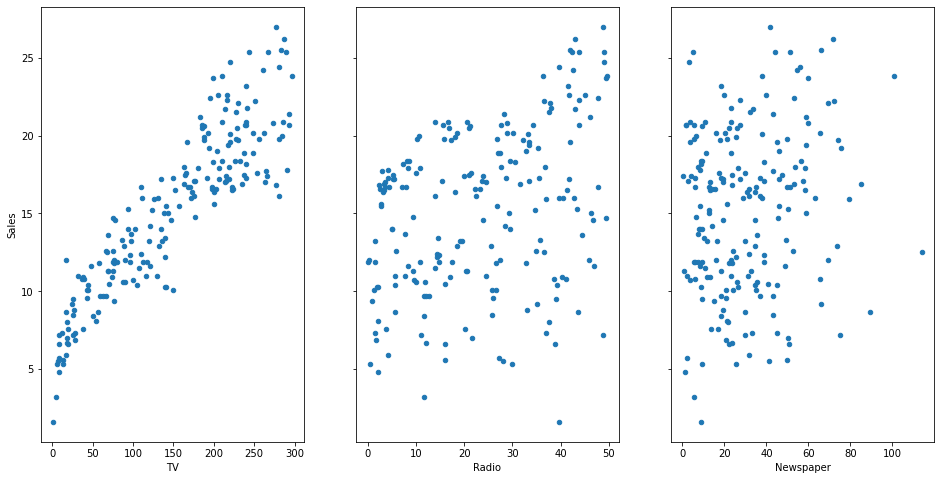

In [6]:
#visualize the relationship between dependent and independent using scatterplots
 
fig, axs = plt.subplots(1,3, sharey = True)
data.plot(kind="scatter",x = 'TV', y = 'Sales', ax = axs[0],figsize=(16,8))
data.plot(kind="scatter",x = 'Radio', y = 'Sales', ax = axs[1])
data.plot(kind="scatter",x = 'Newspaper', y = 'Sales', ax = axs[2])


In [10]:
#create X and y to transform the data
feature_cols = ['TV']
X = data[feature_cols]
y = data.Sales
 
#follow the usual sklearn pattern : import, instantiate, fit
 
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)
 
#print intercept and co-ef
 
print(lm.intercept_)
print(lm.coef_)

6.9748214882298925
[0.05546477]


In [9]:
#manually calculate the prediction for 50,000$ investment
 
result = 6.974821488229891+0.05546477*50
print(result)

9.74805998822989


In [11]:
#you have to create a dataframe since the statsmodel formula expects it
 
X_new = pd.DataFrame({'TV':[50]})
X_new.head()

,TV
0,50


In [12]:
#make predictions for those x values and store them
 
preds = lm.predict(X_new) 
preds

array([9.74806001])

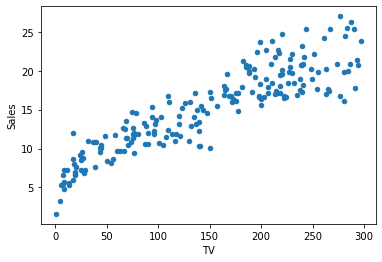

In [13]:
#first plot the observed data
data.plot(kind="scatter",x='TV',y = 'Sales')
 
#then, plot least squared lines
plt.plot(X_new,preds,c = 'g',linewidth=2)

In [14]:
#stats model (ordinary least square)
import statsmodels.formula.api as smf
lm = smf.ols(formula = 'Sales ~ TV', data = data).fit()
lm.conf_int()

,0,1
Intercept,6.338740,7.610903
TV,0.051727,0.059203


#hypothesis testing and p values

In [15]:
#print the p values for the model coef
lm.pvalues

Intercept    5.027719e-54
TV           7.927912e-74
dtype: float64

In [16]:
#to evaluate the overall fit
#r-squared is between 0 and 1, and higher is better
#print the R-squared value for the model
lm.rsquared

0.8121757029987414

#mult-linear regression

In [17]:
feature_cols =['TV','Radio','Newspaper']
X = data[feature_cols]
y = data.Sales
 
lm =LinearRegression()
lm.fit(X, y)
 
#print intercept and coefficients
print(lm.intercept_)
print(lm.coef_)

4.625124078808653
[0.05444578 0.10700123 0.00033566]


In [18]:
lm = smf.ols(formula = 'Sales ~ TV+Radio+Newspaper', data = data).fit()
lm.conf_int()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Fri, 18 Sep 2020   Prob (F-statistic):           8.13e-99
Time:                        09:57:07   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
#infer that tv and radio are dominating the r-squared values
lm = smf.ols(formula = 'Sales ~ TV+Radio', data = data).fit()
lm.rsquared

0.9025896186081139

In [20]:
#much less contribution made by newspaper to increase r-squared value
lm = smf.ols(formula = 'Sales ~ TV+Radio+Newspaper', data = data).fit()
lm.rsquared

0.9025912899684558